<a href="https://colab.research.google.com/github/RuwanPradeep0/Machine-Learning-Module-EC9630/blob/main/Labs/Lab%2002/LAB02_2020E028%2001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EC9630 Machine Learning - Labority 02

Task :

Name : Dasanayaka D.G.R.P

Reg No : 2020/E/028

Date :

Time :


**1. Load the Data**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
url = 'https://archive.ics.uci.edu/static/public/275/data.csv'
data = pd.read_csv(url)

In [3]:
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**2. Preprocessing Steps**

In [4]:
# Drop columns that are not needed or not useful for regression
data = data.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)

In [5]:
# Define the target variable and features
target = 'cnt'
features = data.columns.drop(target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

# Preprocessing: scaling numerical features and encoding categorical features
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
categorical_features = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']


In [6]:
X_train


,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
335,1,0,1,11,0,6,0,1,0.20,0.1970,0.55,0.2239
7035,4,0,10,18,0,2,1,1,0.52,0.5000,0.42,0.1045
8051,4,0,12,3,0,3,1,3,0.46,0.4545,1.00,0.2239
2133,2,0,4,18,0,0,0,2,0.46,0.4545,0.31,0.0000
8485,1,0,12,6,0,0,0,1,0.20,0.2273,0.75,0.1045
...,...,...,...,...,...,...,...,...,...,...,...,...
11284,2,1,4,9,0,5,1,1,0.46,0.4545,0.88,0.0896
11964,2,1,5,17,0,5,1,1,0.66,0.6212,0.34,0.1343
5390,3,0,8,12,0,3,1,1,0.80,0.7273,0.43,0.2836
860,1,0,2,7,0,2,1,1,0.24,0.1970,0.65,0.4179


**3. Fit the Linear Regression Model**

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define the preprocessing steps for numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder())
])

# Combine the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a pipeline that combines the preprocessing and the linear regression model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train the linear regression model
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

**4. Compare Actual vs Predicted Values**

Mean Absolute Error (MAE): 74.10514034451468
Mean Squared Error (MSE): 10089.384435834005
Root Mean Squared Error (RMSE): 100.44592792061809
       Actual   Predicted
12830     425  449.019325
8688       88  162.380550
7091        4    5.144794
12230     526  432.177906
431        13  -68.798652


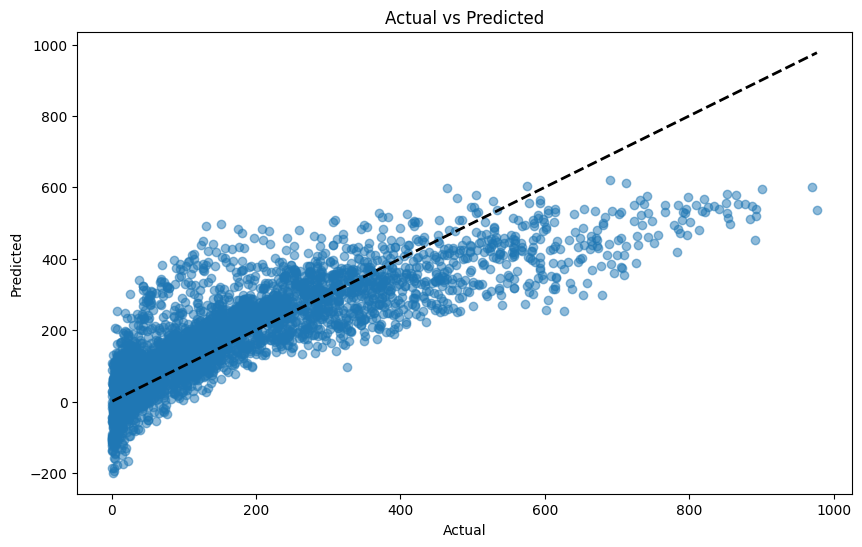

In [8]:
import matplotlib.pyplot as plt

# Calculate the error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Compare actual vs predicted values
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison.head())

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()


**5. Implement L2 and L1 Penalties (Regularization)**

**5.1. Ridge Regression (L2 Penalty)**

In [10]:
from sklearn.linear_model import Ridge

# Implement L1 (Lasso) and L2 (Ridge) regularization
lasso = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=0.1))
])

ridge = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=0.1))
])

# Train Lasso and Ridge models
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)

# Predict on the test data with Lasso and Ridge
y_pred_lasso = lasso.predict(X_test)
y_pred_ridge = ridge.predict(X_test)

**6. Analyze the Impact of Regularization**

Lasso - Mean Absolute Error (MAE): 73.93542319057804
Lasso - Mean Squared Error (MSE): 10074.871745704915
Lasso - Root Mean Squared Error (RMSE): 100.37366061724019
Ridge - Mean Absolute Error (MAE): 74.10344056516689
Ridge - Mean Squared Error (MSE): 10088.889646940392
Ridge - Root Mean Squared Error (RMSE): 100.44346492898576
             Linear      Lasso      Ridge
season_1  21.770577  25.344818  21.957630
season_2  21.258384  20.727225  21.094193
season_3 -15.787010 -17.066103 -15.798091
season_4  -3.786510  -3.514901  -3.791343
yr_0     -33.141474 -38.465228 -33.098592


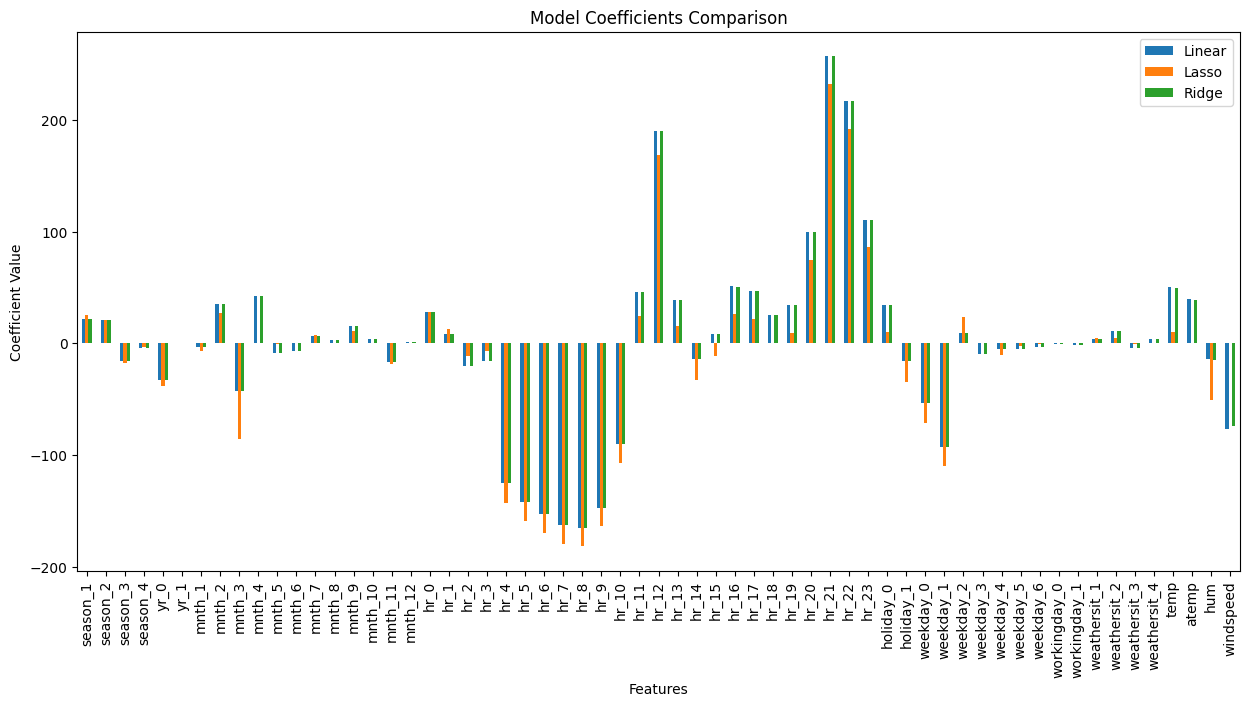

In [11]:
# Calculate the error metrics for Lasso and Ridge
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)

mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)

print(f"Lasso - Mean Absolute Error (MAE): {mae_lasso}")
print(f"Lasso - Mean Squared Error (MSE): {mse_lasso}")
print(f"Lasso - Root Mean Squared Error (RMSE): {rmse_lasso}")

print(f"Ridge - Mean Absolute Error (MAE): {mae_ridge}")
print(f"Ridge - Mean Squared Error (MSE): {mse_ridge}")
print(f"Ridge - Root Mean Squared Error (RMSE): {rmse_ridge}")

# Analyze the impact of regularization on model performance and coefficients
coefficients = pd.DataFrame({
    'Linear': model.named_steps['regressor'].coef_,
    'Lasso': lasso.named_steps['regressor'].coef_,
    'Ridge': ridge.named_steps['regressor'].coef_
}, index=model.named_steps['preprocessor'].transformers_[1][1].named_steps['encoder'].get_feature_names_out(categorical_features).tolist() + numeric_features)

print(coefficients.head())

# Plot coefficients
coefficients.plot(kind='bar', figsize=(15, 7))
plt.title('Model Coefficients Comparison')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.show()